In [28]:
import pandas as pd
#might have to change this import, there were some problems with the umap package
from umap.umap_ import UMAP
from bertopic import BERTopic
from bertopic.representation import KeyBERTInspired
from sklearn.cluster import KMeans
from sklearn.feature_extraction.text import CountVectorizer
from stop_words import get_stop_words
from bertopic.vectorizers import ClassTfidfTransformer

#stop_words = get_stop_words('german').append(['Präsident','Präsidentin','Herr','Frau'])

data = pd.read_csv('../data/speeches_cleaned.csv',sep='|')

#assert(x == y for x,y in (data['text'].str.len().values,data['text_length'].values))

speeches = data['text'].astype(str)

umap_model = UMAP(n_neighbors=15, min_dist=0.3, metric='correlation')
representation_model = KeyBERTInspired()
ctfidf_model = ClassTfidfTransformer(bm25_weighting=True,reduce_frequent_words=True)
#vectorizer_model = CountVectorizer(stop_words=stop_words, ngram_range=(1, 3), min_df=10)
#cluster_model = KMeans(n_clusters=100)
 
topic_model = BERTopic(umap_model = umap_model , language= "multilingual", 
                       min_topic_size=15, representation_model=representation_model,
                      ctfidf_model = ctfidf_model)
topics, probs = topic_model.fit_transform(speeches)

#topic_model.update_topics(speeches, vectorizer_model=vectorizer_model)

In [29]:
topic_model.get_topic_info()

,Topic,Count,Name,Representation,Representative_Docs
0,-1,7924,-1_präsident_bundesregierung_heute_brauchen,"[präsident, bundesregierung, heute, brauchen, ...",[Sehr geehrte Frau Präsidentin! Liebe Kollegin...
1,0,1858,0_demokratie_koalition_parlament_debatte,"[demokratie, koalition, parlament, debatte, ge...",[Herr Präsident! Meine Damen und Herren! Ein g...
2,1,618,1_präsident_politik_deutschland_demokratischen,"[präsident, politik, deutschland, demokratisch...",[Herr Bundespräsident! Verehrte Kolleginnen un...
3,2,498,2_digitalpolitik_digitalministerium_digitalen_...,"[digitalpolitik, digitalministerium, digitalen...",[Sehr geehrte Frau Präsidentin! Liebe Kollegen...
4,3,469,3_verkehrspolitik_verkehrsminister_verkehrsber...,"[verkehrspolitik, verkehrsminister, verkehrsbe...",[Sehr geehrter Herr Präsident! Liebe Kolleginn...
...,...,...,...,...,...
115,114,15,114_verordnungsentwurf_energiepolitische_emiss...,"[verordnungsentwurf, energiepolitische, emissi...",[Herr Präsident! Liebe Kolleginnen und Kollege...
116,115,15,115_iraks_irak_verteidigungsministerin_irakischen,"[iraks, irak, verteidigungsministerin, irakisc...",[Sehr geehrte Damen und Herren! Sehr geehrter ...
117,116,15,116_energiepolitik_energiebedarf_energieversor...,"[energiepolitik, energiebedarf, energieversorg...",[Sehr geehrte Frau Präsidentin! Liebe Kollegin...
118,117,15,117_gedächtnispolitik_außenpolitik_deutschen_d...,"[gedächtnispolitik, außenpolitik, deutschen, d...",[Sehr geehrter Herr Präsident! Liebe Kolleginn...


In [ ]:
topic_model.get_topic_info().to_csv('./output/15_0.3_correlation_12_representationModel_ctidfbm25ReduceFreq.csv')

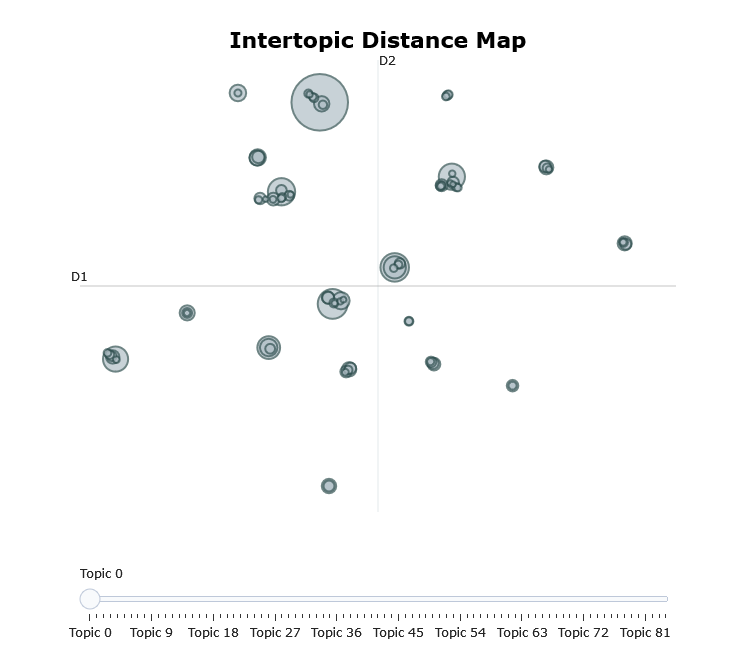

In [27]:
topic_model.visualize_topics()

In [ ]:
topic_model.save('ParlModel')